Part 1 ‑ Exploratory data analysis 
The attached logins.json  file contains (simulated) timestamps of user logins in a particular 
geographic location. Aggregate these login counts based on 15-minute time intervals, and 
visualize and describe the resulting time series of login counts in ways that best characterize the 
underlying patterns of the demand. Please report/illustrate important features of the demand, 
such as daily cycles. If there are data quality issues, please report them. 

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import datetime
import altair as alt
alt.data_transformers.enable('json')
alt.data_transformers.enable('default', max_rows=None)
alt.renderers.enable('notebook')

DataTransformerRegistry.enable('json')

DataTransformerRegistry.enable('default')

RendererRegistry.enable('notebook')

In [2]:
df = pd.read_json('logins.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
df = df.sort_values('login_time')
df['login_time_15min_rounded'] = df.login_time.dt.round('15min')
df.head(5)

,login_time,login_time_15min_rounded
6,1970-01-01 20:12:16,1970-01-01 20:15:00
0,1970-01-01 20:13:18,1970-01-01 20:15:00
1,1970-01-01 20:16:10,1970-01-01 20:15:00
3,1970-01-01 20:16:36,1970-01-01 20:15:00
2,1970-01-01 20:16:37,1970-01-01 20:15:00


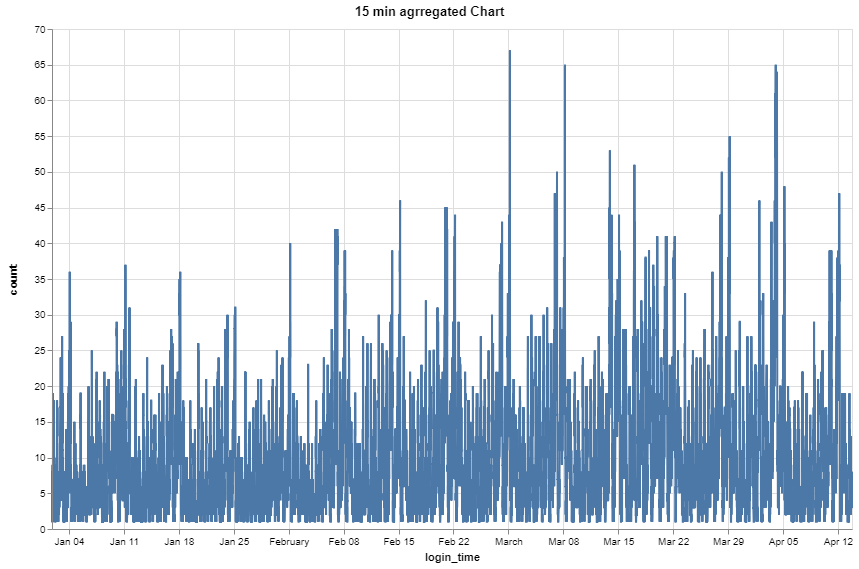

In [4]:
df_temp = df.groupby(['login_time_15min_rounded']).count()
df_temp.columns = ['count']
df_temp.index.names = ['login_time']
df_temp.reset_index(inplace=True)
alt.Chart(df_temp, width=800, height=500).mark_line().encode(
    x='login_time',
    y='count'
).properties(
    title='15 min agrregated Chart')

,hour,count
0,0,5985
1,1,6343
2,2,5890
3,3,4934
4,4,4886


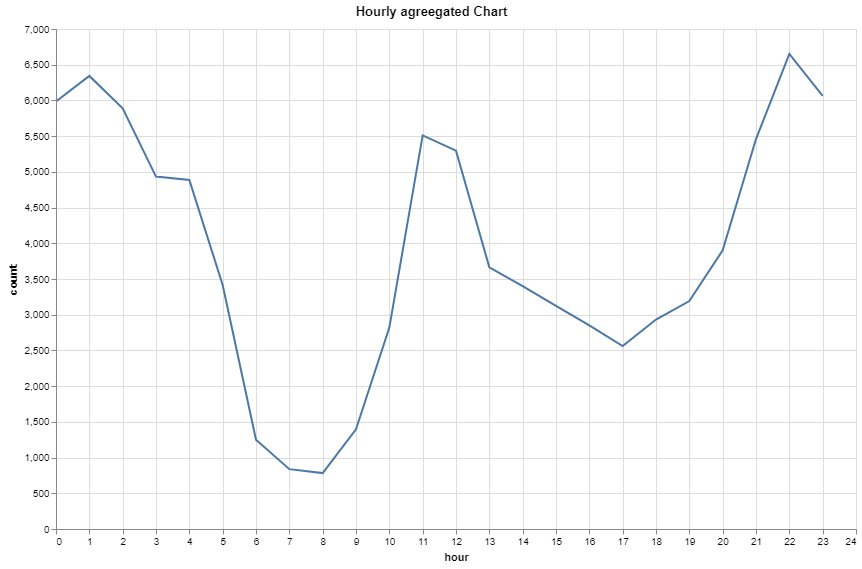

In [5]:
df_temp['hour'] = df_temp.login_time.dt.hour
hourly_agg = df_temp.groupby('hour').sum()
hourly_agg.reset_index(inplace=True)
hourly_agg.head(5)

alt.Chart(hourly_agg, width=800, height=500).mark_line().encode(
    x='hour',
    y='count'
).properties(
    title='Hourly agreegated Chart')

,weekday,count,hour
0,Friday,15172,16260
1,Monday,8836,15635
2,Saturday,19415,16265
3,Sunday,18204,16309
4,Thursday,11963,15066


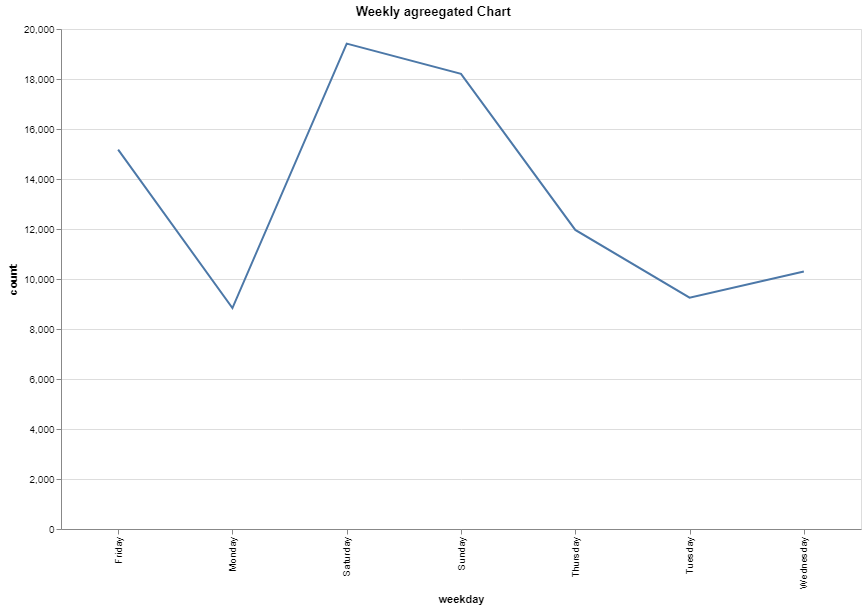

In [6]:
df_temp['weekday'] = df_temp.login_time.dt.day_name()
weekday_agg = df_temp.groupby('weekday').sum()
weekday_agg.reset_index(inplace=True)
weekday_agg.head(5)

alt.Chart(weekday_agg, width=800, height=500).mark_line().encode( #.mark_circle().encode(
    x='weekday',
    y='count'
).properties(
    title='Weekly agreegated Chart')

### Conclusion:
We can see two cyclical patterns here:
1. There is more activity during weekends
2. More users are active around noon and midnight


## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
  
  a. how you will implement the experiment
  
  b. what statistical test(s) you will conduct to verify the significance of the
observation
  
  c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

## Solution

1. Checking out of all drivers available from both the cities how many Gotham drivers are active in Metropolis during the weekday, and how many Metropolis drivers are active in Gotham during the weeknight, would a good check to measure the success of the experiment.  

2. For any business ultimate goal is to generate more revenue and profit.
In order to increase profit, additional income earned during the experiment must outweigh the toll cost reimbursements. We would use the key metric of profit after reimbursement. 

   1. Implement A/B testing: Randomly select half of the drivers to participate in the study while we leave out the other half. After a few months compare the profit made after reimbursement of toll costs. IF we have more budget and time then we can run the same experiment with all drivers for a year. And compare the profit made for this year to the previous year.
   2. After getting our results, we would use a t-test to test for significance (p = 0.05) between each group. 
   3. At the end of the experiment:
    If profits decrease that means reimbursement of toll fees may not have been the most effective way to encourage drivers.
    If profits stayed the same, then the feature should be left intact due to the possible convenience to some drivers. 
    If profits increased that means we can expand the experiments to other categories. eg. gas

### Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

### Data description

* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYY MM DD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

### Data cleaning

In [7]:
# Import data into dataframe
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()
df.head()

# Get description
df.describe()

# Check datatypes and missing values
df.info()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are few missing values. We can impute these columns with mean of the column

In [8]:
# Impute missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

# recheck datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Fixing data types of columns 

In [9]:
# Convert objects to dates
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

### Data Visualization

We want to see how experiment affects profits. We can use trips_in_first_30_days column for this.

In [10]:
# Create dataframes and plots
trips_city = (df[['trips_in_first_30_days', 'city', 'phone']].groupby('city').sum().reset_index())
trips_phone= df[['trips_in_first_30_days', 'city', 'phone']].groupby('phone').sum().reset_index()


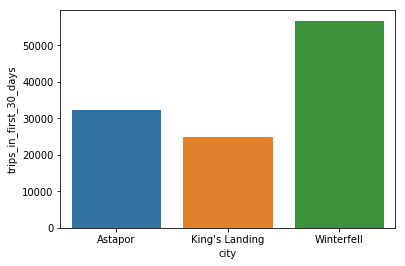

In [11]:
# Plot 
sns.barplot(x='city', y='trips_in_first_30_days', data=trips_city)

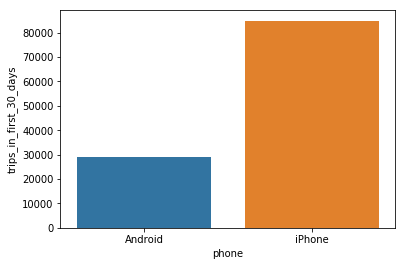

In [12]:
sns.barplot(x='phone', y='trips_in_first_30_days', data=trips_phone)

In [13]:
# Analysis of retained users 
# max date recorded
df[['last_trip_date']].max()

# Total active users
len(df[df['last_trip_date'] >= '2014-06-01'])

# Total inactive users
len(df[df['last_trip_date'] < '2014-06-01'])

# Total users
len(df)

# Entering the new parameters
df['retained'] = np.nan
df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'retained'] = 0

# Retained users ratio
round(df['retained'].sum()/len(df)*100, 2)

last_trip_date   2014-07-01
dtype: datetime64[ns]

18804

31196

50000

37.61

## Data Preprocessing

In [14]:
# We can use retained values as label 
y = df['retained'].values

# Removing unnecessary columns
df.drop('last_trip_date', axis=1, inplace=True)
df.drop('signup_date', axis=1, inplace=True)
df = df.drop('retained', axis=1)

In [15]:
# Convert categorical columns to integers using One-hot-encode
df_encoded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])
df_encoded.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,1,0,1,0


In [16]:
# features
X = df_encoded.values
X[0]
y[0]

array([ 3.67,  5.  ,  4.7 ,  1.1 , 15.4 ,  4.  , 46.2 ,  0.  ,  1.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  1.  ])

1.0

In [17]:
# Split datasets into train 80% and test 20% set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train[0]

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[0]

array([  1.29,   5.  ,   5.  ,   1.  ,   0.  ,   1.  , 100.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ])

array([-0.79233047,  0.49455397,  0.70286125, -0.33452106, -0.44229348,
       -0.3384617 ,  1.04993153, -0.70594037, -0.50304505,  1.07166155,
       -0.65788959,  0.65788959, -1.29099445,  1.29099445])

### Use Neural Network for Predictive Model

Neural network with TensorFlow and Keras. 
The Sequential package is used to initialization of neural network. 
The Dense package is used to layer neural network.

In [18]:
# import packages
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [19]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 1000000})

In [20]:
# initialization 
classifier = Sequential()

# Add input layer and the first hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))

# Add second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

# Add output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compile Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit Neural Network to Training set
classifier.fit(X_train, y_train, batch_size = 16, epochs = 10)

Epoch 1/10
40000/40000 [==============================] - 12s 294us/step - loss: 0.5470 - acc: 0.7290
Epoch 2/10
40000/40000 [==============================] - 2s 49us/step - loss: 0.4972 - acc: 0.7654
Epoch 3/10
40000/40000 [==============================] - 2s 47us/step - loss: 0.4913 - acc: 0.7691
Epoch 4/10
40000/40000 [==============================] - 2s 45us/step - loss: 0.4898 - acc: 0.7714
Epoch 5/10
40000/40000 [==============================] - 2s 43us/step - loss: 0.4886 - acc: 0.7729
Epoch 6/10
40000/40000 [==============================] - 2s 46us/step - loss: 0.4870 - acc: 0.7735
Epoch 7/10
40000/40000 [==============================] - 2s 50us/step - loss: 0.4869 - acc: 0.7732
Epoch 8/10
40000/40000 [==============================] - 2s 48us/step - loss: 0.4859 - acc: 0.7738
Epoch 9/10
40000/40000 [==============================] - 2s 49us/step - loss: 0.4854 - acc: 0.7729
Epoch 10/10
40000/40000 [==============================] - 2s 48us/step - loss: 0.4848 - acc: 0.77

**Our model has an 77.41% accuracy. Not bad. Let's try to improve it**

### Making Predictions and Evaluating the Model

I am using 50% as threshold for predicting retention rate. Then print  confusion matrix to see the results.

In [22]:
# Predict Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5355  864]
 [1416 2365]]


In [27]:
# confusion matrix
pos, neg = cm
tp, fp = pos
fn, tn = neg
print('True Positives:', tp)
print('True Negatives:', tn)
print('False Positives:', fp)
print('False Negatives:', fn)

True Positives: 5355
True Negatives: 2365
False Positives: 864
False Negatives: 1416


Text(114,0.5,'Actual')

Text(0.5,69,'Predicted')

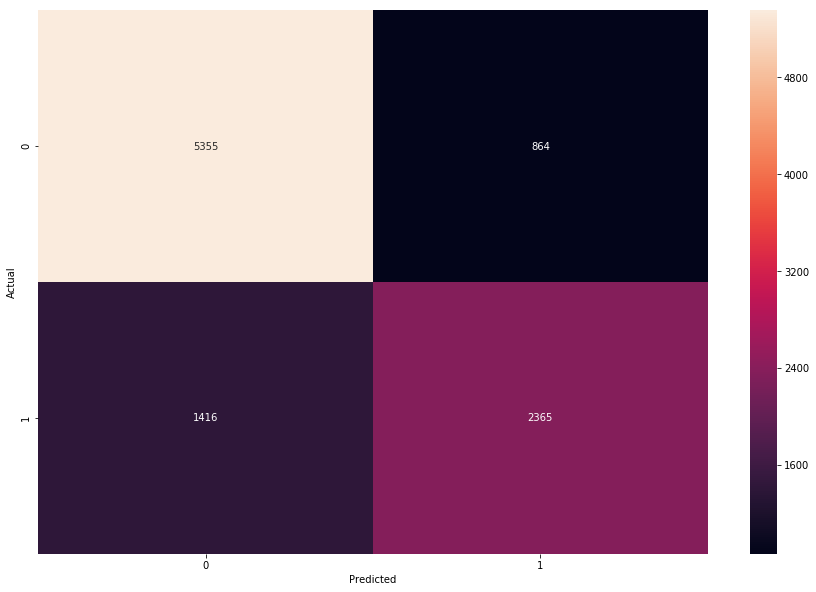

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [28]:
## classification report

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.79      0.86      0.82      6219
        1.0       0.73      0.63      0.67      3781

avg / total       0.77      0.77      0.77     10000



In [29]:
# Accuracy rate of confusion matrix
print('Accuracy:', (tp+tn)/(tp+tn+fp+fn))

Accuracy: 0.772


### Test Neural Network Model

Here we test our neural network predicting feature with an example user.

In [30]:
ex_user = pd.DataFrame([0.77, 5., 4.3, 1., 0., 3., 100.,
          1., 0., 0., 0., 1., 1., 0.])
ex_user = ex_user.T
ex_user.columns = df_encoded.columns
ex_user

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0.77,5.0,4.3,1.0,0.0,3.0,100.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [31]:
# Making prediction for given user
new_prediction = classifier.predict(
    sc.transform(np.array(ex_user.values)))
new_prediction_tf = (new_prediction > 0.5)
print('Customer will retain:', new_prediction_tf, new_prediction)

Customer will retain: [[False]] [[0.10609043]]


Model predicts that this user will not be retained after 6 months. 10.60% chance of retaining is way below our 50% threshold.

### Evaluation and Tuning

#### Evaluating the Neural Network
We will use k-fold cross validation to improve our test set accuracy. To do this, we use scikit-learn's cross val score. We also use keras.wrappers to wrap scikit learn around keras.

In [32]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [33]:
# Fit Neural Network to Training set and get accuracies
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 16, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

Epoch 1/10
36000/36000 [==============================] - 3s 90us/step - loss: 0.5560 - acc: 0.7224
Epoch 2/10
36000/36000 [==============================] - 3s 79us/step - loss: 0.5202 - acc: 0.7465
Epoch 3/10
36000/36000 [==============================] - 3s 74us/step - loss: 0.5082 - acc: 0.7559
Epoch 4/10
36000/36000 [==============================] - 3s 74us/step - loss: 0.5018 - acc: 0.7601
Epoch 5/10
36000/36000 [==============================] - 3s 75us/step - loss: 0.4981 - acc: 0.7639
Epoch 6/10
36000/36000 [==============================] - 3s 74us/step - loss: 0.4951 - acc: 0.7651
Epoch 7/10
36000/36000 [==============================] - 3s 74us/step - loss: 0.4927 - acc: 0.7700
Epoch 8/10
36000/36000 [==============================] - 3s 74us/step - loss: 0.4912 - acc: 0.7704
Epoch 9/10
36000/36000 [==============================] - 3s 74us/step - loss: 0.4901 - acc: 0.7712
Epoch 10/10
4000/4000 [==============================] - 0s 50us/step
Epoch 1/10
36000/36000 [======

36000/36000 [==============================] - 3s 84us/step - loss: 0.4852 - acc: 0.7716
Epoch 9/10
36000/36000 [==============================] - 3s 84us/step - loss: 0.4849 - acc: 0.7730
Epoch 10/10
4000/4000 [==============================] - 0s 84us/step
Epoch 1/10
36000/36000 [==============================] - 4s 108us/step - loss: 0.5641 - acc: 0.7167
Epoch 2/10
36000/36000 [==============================] - 3s 85us/step - loss: 0.5146 - acc: 0.7624
Epoch 3/10
36000/36000 [==============================] - 3s 82us/step - loss: 0.4989 - acc: 0.7693
Epoch 4/10
36000/36000 [==============================] - 3s 83us/step - loss: 0.4940 - acc: 0.7700
Epoch 5/10
36000/36000 [==============================] - 3s 86us/step - loss: 0.4914 - acc: 0.7718
Epoch 6/10
36000/36000 [==============================] - 3s 85us/step - loss: 0.4895 - acc: 0.7722:
Epoch 7/10
36000/36000 [==============================] - 3s 84us/step - loss: 0.4883 - acc: 0.7724
Epoch 8/10
36000/36000 [===============

In [34]:
mean = accuracies.mean()
variance = accuracies.std()
print('Average: ', ('%.4f' % mean))
print('Standard Deviation: ', ('%.4f' % variance))

Average:  0.7716
Standard Deviation:  0.0054


### Tuning the Neural Network

Use grid search to tune our hyper parameters such as batch size and epochs.

In [36]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [37]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)

In [38]:
# Parameters for batch size, epochs, and optimizer functions
parameters = {'batch_size': [16, 32],
              'epochs': [10, 50],
              'optimizer': ['adam', 'rmsprop']}

In [40]:
# setup up Grid Search
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/10
36000/36000 [==============================] - 4s 114us/step - loss: 0.5634 - acc: 0.7167
Epoch 2/10
36000/36000 [==============================] - 3s 91us/step - loss: 0.5214 - acc: 0.7535
Epoch 3/10
36000/36000 [==============================] - 3s 92us/step - loss: 0.5091 - acc: 0.7597: 0s - loss: 0.509
Epoch 4/10
36000/36000 [==============================] - 3s 93us/step - loss: 0.5024 - acc: 0.7638
Epoch 5/10
36000/36000 [==============================] - 3s 91us/step - loss: 0.4980 - acc: 0.7657
Epoch 6/10
36000/36000 [==============================] - 3s 91us/step - loss: 0.4950 - acc: 0.7673
Epoch 7/10
36000/36000 [==============================] - 3s 89us/step - loss: 0.4938 - acc: 0.7684
Epoch 8/10
36000/36000 [==============================] - 3s 90us/step - loss: 0.4922 - acc: 0.7702
Epoch 9/10
36000/36000 [==============================] - 3s 88us/step - loss: 0.4914 - acc: 0.7708
Epoch 10/10
36000/36000 [==============================] - 3s 90us/step - loss: 0

Epoch 1/10
36000/36000 [==============================] - 5s 140us/step - loss: 0.5772 - acc: 0.7044
Epoch 2/10
36000/36000 [==============================] - 4s 107us/step - loss: 0.5314 - acc: 0.7458
Epoch 3/10
36000/36000 [==============================] - 4s 107us/step - loss: 0.5136 - acc: 0.7545
Epoch 4/10
36000/36000 [==============================] - 4s 110us/step - loss: 0.5068 - acc: 0.7592
Epoch 5/10
36000/36000 [==============================] - 4s 111us/step - loss: 0.5021 - acc: 0.7632 1s - lo
Epoch 6/10
36000/36000 [==============================] - 4s 104us/step - loss: 0.4981 - acc: 0.7658
Epoch 7/10
36000/36000 [==============================] - 4s 107us/step - loss: 0.4951 - acc: 0.7663
Epoch 8/10
36000/36000 [==============================] - 4s 110us/step - loss: 0.4934 - acc: 0.7673
Epoch 9/10
36000/36000 [==============================] - 4s 119us/step - loss: 0.4919 - acc: 0.7682
Epoch 10/10
36000/36000 [==============================] - 4s 112us/step - loss: 0.

36000/36000 [==============================] - 5s 140us/step - loss: 0.5620 - acc: 0.7191
Epoch 2/10
36000/36000 [==============================] - 4s 105us/step - loss: 0.5240 - acc: 0.7451
Epoch 3/10
36000/36000 [==============================] - 4s 104us/step - loss: 0.5090 - acc: 0.7549
Epoch 4/10
36000/36000 [==============================] - 4s 104us/step - loss: 0.5050 - acc: 0.7579
Epoch 5/10
36000/36000 [==============================] - 4s 104us/step - loss: 0.5029 - acc: 0.7594
Epoch 6/10
36000/36000 [==============================] - 4s 104us/step - loss: 0.5014 - acc: 0.7601
Epoch 7/10
36000/36000 [==============================] - 4s 104us/step - loss: 0.5007 - acc: 0.7617
Epoch 8/10
36000/36000 [==============================] - 4s 106us/step - loss: 0.4999 - acc: 0.7618
Epoch 9/10
36000/36000 [==============================] - 4s 104us/step - loss: 0.4988 - acc: 0.7628
Epoch 10/10
36000/36000 [==============================] - 4s 103us/step - loss: 0.4975 - acc: 0.7651


36000/36000 [==============================] - 4s 111us/step - loss: 0.4795 - acc: 0.7763 0s - loss: 0.4794 - acc: 0.776
Epoch 42/50
36000/36000 [==============================] - 4s 110us/step - loss: 0.4798 - acc: 0.7752 1s - 
Epoch 43/50
36000/36000 [==============================] - 4s 112us/step - loss: 0.4795 - acc: 0.7764
Epoch 44/50
36000/36000 [==============================] - 4s 124us/step - loss: 0.4792 - acc: 0.7758
Epoch 45/50
36000/36000 [==============================] - 4s 114us/step - loss: 0.4791 - acc: 0.7760
Epoch 46/50
36000/36000 [==============================] - 4s 114us/step - loss: 0.4793 - acc: 0.7763
Epoch 47/50
36000/36000 [==============================] - 4s 113us/step - loss: 0.4793 - acc: 0.7766
Epoch 48/50
36000/36000 [==============================] - 4s 114us/step - loss: 0.4792 - acc: 0.7771
Epoch 49/50
36000/36000 [==============================] - 4s 121us/step - loss: 0.4790 - acc: 0.7766
Epoch 50/50
36000/36000 [==============================] 

36000/36000 [==============================] - 4s 123us/step - loss: 0.4827 - acc: 0.7729
Epoch 21/50
36000/36000 [==============================] - 4s 119us/step - loss: 0.4823 - acc: 0.7742
Epoch 22/50
36000/36000 [==============================] - 4s 121us/step - loss: 0.4821 - acc: 0.7745
Epoch 23/50
36000/36000 [==============================] - 4s 121us/step - loss: 0.4824 - acc: 0.7733
Epoch 24/50
36000/36000 [==============================] - 4s 119us/step - loss: 0.4820 - acc: 0.7743
Epoch 25/50
36000/36000 [==============================] - 4s 119us/step - loss: 0.4815 - acc: 0.7742
Epoch 26/50
36000/36000 [==============================] - 5s 131us/step - loss: 0.4813 - acc: 0.7746
Epoch 27/50
36000/36000 [==============================] - 5s 127us/step - loss: 0.4809 - acc: 0.7752
Epoch 28/50
36000/36000 [==============================] - 5s 131us/step - loss: 0.4810 - acc: 0.7752
Epoch 29/50
36000/36000 [==============================] - 4s 123us/step - loss: 0.4804 - acc:

36000/36000 [==============================] - 4s 118us/step - loss: 0.4783 - acc: 0.7762
Epoch 50/50
36000/36000 [==============================] - 4s 118us/step - loss: 0.4776 - acc: 0.7758
Epoch 1/50
36000/36000 [==============================] - 6s 165us/step - loss: 0.5507 - acc: 0.7256
Epoch 2/50
36000/36000 [==============================] - 5s 131us/step - loss: 0.5071 - acc: 0.7589
Epoch 3/50
36000/36000 [==============================] - 4s 121us/step - loss: 0.4949 - acc: 0.7669
Epoch 4/50
36000/36000 [==============================] - 4s 120us/step - loss: 0.4915 - acc: 0.7686
Epoch 5/50
36000/36000 [==============================] - 4s 121us/step - loss: 0.4899 - acc: 0.7691
Epoch 6/50
36000/36000 [==============================] - 4s 121us/step - loss: 0.4891 - acc: 0.7705
Epoch 7/50
36000/36000 [==============================] - 4s 120us/step - loss: 0.4883 - acc: 0.7707
Epoch 8/50
36000/36000 [==============================] - 4s 120us/step - loss: 0.4872 - acc: 0.7711


36000/36000 [==============================] - 3s 75us/step - loss: 0.4772 - acc: 0.7772
Epoch 30/50
36000/36000 [==============================] - 3s 74us/step - loss: 0.4773 - acc: 0.7767
Epoch 31/50
36000/36000 [==============================] - 3s 74us/step - loss: 0.4772 - acc: 0.7763
Epoch 32/50
36000/36000 [==============================] - 3s 74us/step - loss: 0.4772 - acc: 0.7766
Epoch 33/50
36000/36000 [==============================] - 3s 75us/step - loss: 0.4769 - acc: 0.7783
Epoch 34/50
36000/36000 [==============================] - 3s 74us/step - loss: 0.4765 - acc: 0.7775
Epoch 35/50
36000/36000 [==============================] - 3s 75us/step - loss: 0.4766 - acc: 0.7766
Epoch 36/50
36000/36000 [==============================] - 3s 74us/step - loss: 0.4766 - acc: 0.7766
Epoch 37/50
36000/36000 [==============================] - 3s 74us/step - loss: 0.4762 - acc: 0.7769
Epoch 38/50
36000/36000 [==============================] - 3s 74us/step - loss: 0.4763 - acc: 0.7777
Ep

36000/36000 [==============================] - 3s 76us/step - loss: 0.4830 - acc: 0.7730
Epoch 11/50
36000/36000 [==============================] - 3s 76us/step - loss: 0.4825 - acc: 0.7747
Epoch 12/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.4819 - acc: 0.7747
Epoch 13/50
36000/36000 [==============================] - 3s 76us/step - loss: 0.4824 - acc: 0.7751: 0s - loss: 0.4831 - acc: 0.77
Epoch 14/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.4817 - acc: 0.7742
Epoch 15/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.4816 - acc: 0.7746
Epoch 16/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.4818 - acc: 0.7763
Epoch 17/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.4817 - acc: 0.7749
Epoch 18/50
36000/36000 [==============================] - 3s 76us/step - loss: 0.4814 - acc: 0.7759
Epoch 19/50
36000/36000 [==============================] - 3s 85us/step 

36000/36000 [==============================] - 3s 77us/step - loss: 0.4773 - acc: 0.7786
Epoch 41/50
36000/36000 [==============================] - 3s 79us/step - loss: 0.4766 - acc: 0.7776
Epoch 42/50
36000/36000 [==============================] - 3s 79us/step - loss: 0.4770 - acc: 0.7777
Epoch 43/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.4767 - acc: 0.7778
Epoch 44/50
36000/36000 [==============================] - 3s 78us/step - loss: 0.4766 - acc: 0.7780
Epoch 45/50
36000/36000 [==============================] - 3s 78us/step - loss: 0.4764 - acc: 0.7780
Epoch 46/50
36000/36000 [==============================] - 3s 78us/step - loss: 0.4767 - acc: 0.7784
Epoch 47/50
36000/36000 [==============================] - 3s 78us/step - loss: 0.4765 - acc: 0.7777
Epoch 48/50
36000/36000 [==============================] - 3s 79us/step - loss: 0.4760 - acc: 0.7776
Epoch 49/50
36000/36000 [==============================] - 3s 79us/step - loss: 0.4765 - acc: 0.7776
Ep

36000/36000 [==============================] - 3s 75us/step - loss: 0.4834 - acc: 0.7741
Epoch 22/50
36000/36000 [==============================] - 3s 81us/step - loss: 0.4827 - acc: 0.7746
Epoch 23/50
36000/36000 [==============================] - 3s 75us/step - loss: 0.4828 - acc: 0.7753
Epoch 24/50
36000/36000 [==============================] - 3s 76us/step - loss: 0.4827 - acc: 0.7756
Epoch 25/50
36000/36000 [==============================] - 3s 75us/step - loss: 0.4828 - acc: 0.7746
Epoch 26/50
36000/36000 [==============================] - 3s 75us/step - loss: 0.4829 - acc: 0.7758
Epoch 27/50
36000/36000 [==============================] - 3s 76us/step - loss: 0.4824 - acc: 0.7757
Epoch 28/50
36000/36000 [==============================] - 3s 76us/step - loss: 0.4827 - acc: 0.7757
Epoch 29/50
36000/36000 [==============================] - 3s 76us/step - loss: 0.4824 - acc: 0.7755
Epoch 30/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.4820 - acc: 0.7749
Ep

36000/36000 [==============================] - 3s 77us/step - loss: 0.5220 - acc: 0.7458
Epoch 3/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.5088 - acc: 0.7548
Epoch 4/50
36000/36000 [==============================] - 3s 76us/step - loss: 0.5052 - acc: 0.7594
Epoch 5/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.5029 - acc: 0.7598
Epoch 6/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.5016 - acc: 0.7607
Epoch 7/50
36000/36000 [==============================] - 3s 76us/step - loss: 0.4999 - acc: 0.7629
Epoch 8/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.4976 - acc: 0.7660: 0s - loss: 0
Epoch 9/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.4929 - acc: 0.7686
Epoch 10/50
36000/36000 [==============================] - 3s 76us/step - loss: 0.4902 - acc: 0.7695
Epoch 11/50
36000/36000 [==============================] - 3s 78us/step - loss: 0.4893 - acc: 0.

36000/36000 [==============================] - 3s 79us/step - loss: 0.4793 - acc: 0.7754
Epoch 34/50
36000/36000 [==============================] - 3s 78us/step - loss: 0.4796 - acc: 0.7753: 1s - los
Epoch 35/50
36000/36000 [==============================] - 3s 78us/step - loss: 0.4792 - acc: 0.7756
Epoch 36/50
36000/36000 [==============================] - 3s 79us/step - loss: 0.4790 - acc: 0.7754
Epoch 37/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.4788 - acc: 0.7759
Epoch 38/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.4787 - acc: 0.7764
Epoch 39/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.4785 - acc: 0.7756
Epoch 40/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.4782 - acc: 0.7760
Epoch 41/50
36000/36000 [==============================] - 3s 77us/step - loss: 0.4780 - acc: 0.7757
Epoch 42/50
36000/36000 [==============================] - 3s 78us/step - loss: 0.4773 - acc:

36000/36000 [==============================] - 3s 79us/step - loss: 0.4838 - acc: 0.7742
Epoch 15/50
36000/36000 [==============================] - 3s 78us/step - loss: 0.4829 - acc: 0.7740
Epoch 16/50
36000/36000 [==============================] - 3s 79us/step - loss: 0.4827 - acc: 0.7742
Epoch 17/50
36000/36000 [==============================] - 3s 79us/step - loss: 0.4826 - acc: 0.7747
Epoch 18/50
36000/36000 [==============================] - 3s 79us/step - loss: 0.4824 - acc: 0.7755
Epoch 19/50
36000/36000 [==============================] - 3s 78us/step - loss: 0.4819 - acc: 0.7749
Epoch 20/50
36000/36000 [==============================] - 3s 79us/step - loss: 0.4818 - acc: 0.7748
Epoch 21/50
36000/36000 [==============================] - 3s 79us/step - loss: 0.4815 - acc: 0.7762
Epoch 22/50
36000/36000 [==============================] - 3s 78us/step - loss: 0.4818 - acc: 0.7757
Epoch 23/50
36000/36000 [==============================] - 3s 78us/step - loss: 0.4814 - acc: 0.7754
Ep

36000/36000 [==============================] - 3s 85us/step - loss: 0.4815 - acc: 0.7768
Epoch 46/50
36000/36000 [==============================] - 3s 86us/step - loss: 0.4811 - acc: 0.7773
Epoch 47/50
36000/36000 [==============================] - 3s 85us/step - loss: 0.4814 - acc: 0.7779
Epoch 48/50
36000/36000 [==============================] - 3s 86us/step - loss: 0.4808 - acc: 0.7777
Epoch 49/50
36000/36000 [==============================] - 3s 85us/step - loss: 0.4809 - acc: 0.7781
Epoch 50/50
36000/36000 [==============================] - 3s 86us/step - loss: 0.4810 - acc: 0.7783
Epoch 1/50
36000/36000 [==============================] - 5s 127us/step - loss: 0.5604 - acc: 0.7159
Epoch 2/50
36000/36000 [==============================] - 3s 85us/step - loss: 0.5073 - acc: 0.7615
Epoch 3/50
36000/36000 [==============================] - 3s 85us/step - loss: 0.4957 - acc: 0.7684
Epoch 4/50
36000/36000 [==============================] - 3s 85us/step - loss: 0.4920 - acc: 0.7704
Epoch

36000/36000 [==============================] - 3s 88us/step - loss: 0.4860 - acc: 0.7735
Epoch 26/50
36000/36000 [==============================] - 3s 89us/step - loss: 0.4853 - acc: 0.7738
Epoch 27/50
36000/36000 [==============================] - 3s 87us/step - loss: 0.4850 - acc: 0.7744
Epoch 28/50
36000/36000 [==============================] - 3s 88us/step - loss: 0.4845 - acc: 0.7746
Epoch 29/50
36000/36000 [==============================] - 3s 89us/step - loss: 0.4840 - acc: 0.7758
Epoch 30/50
36000/36000 [==============================] - 3s 88us/step - loss: 0.4840 - acc: 0.7739
Epoch 31/50
36000/36000 [==============================] - 3s 88us/step - loss: 0.4838 - acc: 0.7742
Epoch 32/50
36000/36000 [==============================] - 3s 89us/step - loss: 0.4827 - acc: 0.7759
Epoch 33/50
36000/36000 [==============================] - 3s 88us/step - loss: 0.4829 - acc: 0.7750
Epoch 34/50
36000/36000 [==============================] - 3s 88us/step - loss: 0.4823 - acc: 0.7758
Ep

36000/36000 [==============================] - 2s 46us/step - loss: 0.5048 - acc: 0.7595
Epoch 7/10
36000/36000 [==============================] - 2s 46us/step - loss: 0.5026 - acc: 0.7601
Epoch 8/10
36000/36000 [==============================] - 2s 46us/step - loss: 0.5013 - acc: 0.7616
Epoch 9/10
36000/36000 [==============================] - 2s 46us/step - loss: 0.4993 - acc: 0.7626
Epoch 10/10
36000/36000 [==============================] - 2s 46us/step - loss: 0.4985 - acc: 0.7630
Epoch 1/10
36000/36000 [==============================] - 3s 94us/step - loss: 0.5645 - acc: 0.7122
Epoch 2/10
36000/36000 [==============================] - 2s 49us/step - loss: 0.5187 - acc: 0.7486
Epoch 3/10
36000/36000 [==============================] - 2s 48us/step - loss: 0.5021 - acc: 0.7609
Epoch 4/10
36000/36000 [==============================] - 2s 50us/step - loss: 0.4951 - acc: 0.7662
Epoch 5/10
36000/36000 [==============================] - 2s 47us/step - loss: 0.4921 - acc: 0.7689
Epoch 6/10

36000/36000 [==============================] - 2s 52us/step - loss: 0.5047 - acc: 0.7561
Epoch 8/10
36000/36000 [==============================] - 2s 52us/step - loss: 0.5034 - acc: 0.7581
Epoch 9/10
36000/36000 [==============================] - 2s 52us/step - loss: 0.5014 - acc: 0.7595
Epoch 10/10
36000/36000 [==============================] - 2s 52us/step - loss: 0.5000 - acc: 0.7601
Epoch 1/10
36000/36000 [==============================] - 4s 107us/step - loss: 0.5770 - acc: 0.7017
Epoch 2/10
36000/36000 [==============================] - 2s 53us/step - loss: 0.5354 - acc: 0.7474
Epoch 3/10
36000/36000 [==============================] - 2s 54us/step - loss: 0.5180 - acc: 0.7562
Epoch 4/10
36000/36000 [==============================] - 2s 53us/step - loss: 0.5071 - acc: 0.7634
Epoch 5/10
36000/36000 [==============================] - 2s 54us/step - loss: 0.5004 - acc: 0.7672
Epoch 6/10
36000/36000 [==============================] - 2s 53us/step - loss: 0.4967 - acc: 0.7676
Epoch 7/1

36000/36000 [==============================] - 3s 87us/step - loss: 0.4870 - acc: 0.7722
Epoch 9/10
36000/36000 [==============================] - 3s 75us/step - loss: 0.4861 - acc: 0.7723
Epoch 10/10
36000/36000 [==============================] - 3s 70us/step - loss: 0.4855 - acc: 0.7729
Epoch 1/10
36000/36000 [==============================] - 4s 115us/step - loss: 0.5727 - acc: 0.7062
Epoch 2/10
36000/36000 [==============================] - 2s 56us/step - loss: 0.5253 - acc: 0.7440
Epoch 3/10
36000/36000 [==============================] - 2s 55us/step - loss: 0.5086 - acc: 0.7550
Epoch 4/10
36000/36000 [==============================] - 2s 55us/step - loss: 0.4990 - acc: 0.7619
Epoch 5/10
36000/36000 [==============================] - 2s 57us/step - loss: 0.4945 - acc: 0.7668
Epoch 6/10
36000/36000 [==============================] - 2s 55us/step - loss: 0.4922 - acc: 0.7686
Epoch 7/10
36000/36000 [==============================] - 2s 56us/step - loss: 0.4911 - acc: 0.7691
Epoch 8/1

36000/36000 [==============================] - 2s 58us/step - loss: 0.4699 - acc: 0.7794
Epoch 50/50
36000/36000 [==============================] - 2s 59us/step - loss: 0.4697 - acc: 0.7795
Epoch 1/50
36000/36000 [==============================] - 4s 122us/step - loss: 0.5653 - acc: 0.7151
Epoch 2/50
36000/36000 [==============================] - 2s 60us/step - loss: 0.5226 - acc: 0.7436
Epoch 3/50
36000/36000 [==============================] - 2s 60us/step - loss: 0.5019 - acc: 0.7591
Epoch 4/50
36000/36000 [==============================] - 2s 60us/step - loss: 0.4918 - acc: 0.7686
Epoch 5/50
36000/36000 [==============================] - 2s 59us/step - loss: 0.4886 - acc: 0.7698
Epoch 6/50
36000/36000 [==============================] - 2s 58us/step - loss: 0.4871 - acc: 0.7711
Epoch 7/50
36000/36000 [==============================] - 2s 58us/step - loss: 0.4856 - acc: 0.7718
Epoch 8/50
36000/36000 [==============================] - 2s 60us/step - loss: 0.4845 - acc: 0.7719
Epoch 9/5

36000/36000 [==============================] - 2s 60us/step - loss: 0.4817 - acc: 0.7748
Epoch 30/50
36000/36000 [==============================] - 2s 60us/step - loss: 0.4818 - acc: 0.7746
Epoch 31/50
36000/36000 [==============================] - 2s 59us/step - loss: 0.4814 - acc: 0.7758
Epoch 32/50
36000/36000 [==============================] - 2s 61us/step - loss: 0.4815 - acc: 0.7760
Epoch 33/50
36000/36000 [==============================] - 2s 60us/step - loss: 0.4810 - acc: 0.7740
Epoch 34/50
36000/36000 [==============================] - 2s 59us/step - loss: 0.4812 - acc: 0.7754
Epoch 35/50
36000/36000 [==============================] - 2s 60us/step - loss: 0.4813 - acc: 0.7744
Epoch 36/50
36000/36000 [==============================] - 2s 60us/step - loss: 0.4807 - acc: 0.7758
Epoch 37/50
36000/36000 [==============================] - 2s 60us/step - loss: 0.4808 - acc: 0.7744
Epoch 38/50
36000/36000 [==============================] - 2s 59us/step - loss: 0.4808 - acc: 0.7749
Ep

36000/36000 [==============================] - 2s 62us/step - loss: 0.4873 - acc: 0.7703
Epoch 11/50
36000/36000 [==============================] - 2s 61us/step - loss: 0.4867 - acc: 0.7716
Epoch 12/50
36000/36000 [==============================] - 2s 61us/step - loss: 0.4866 - acc: 0.7716
Epoch 13/50
36000/36000 [==============================] - 2s 62us/step - loss: 0.4859 - acc: 0.7716
Epoch 14/50
36000/36000 [==============================] - 2s 62us/step - loss: 0.4854 - acc: 0.7716
Epoch 15/50
36000/36000 [==============================] - 2s 62us/step - loss: 0.4851 - acc: 0.7718
Epoch 16/50
36000/36000 [==============================] - 2s 62us/step - loss: 0.4843 - acc: 0.7728
Epoch 17/50
36000/36000 [==============================] - 2s 60us/step - loss: 0.4842 - acc: 0.7733
Epoch 18/50
36000/36000 [==============================] - 2s 60us/step - loss: 0.4839 - acc: 0.7718
Epoch 19/50
36000/36000 [==============================] - 2s 61us/step - loss: 0.4831 - acc: 0.7733
Ep

36000/36000 [==============================] - 2s 63us/step - loss: 0.4792 - acc: 0.7765
Epoch 42/50
36000/36000 [==============================] - 2s 63us/step - loss: 0.4788 - acc: 0.7762
Epoch 43/50
36000/36000 [==============================] - 2s 64us/step - loss: 0.4790 - acc: 0.7769
Epoch 44/50
36000/36000 [==============================] - 2s 63us/step - loss: 0.4790 - acc: 0.7769
Epoch 45/50
36000/36000 [==============================] - 2s 65us/step - loss: 0.4788 - acc: 0.7764
Epoch 46/50
36000/36000 [==============================] - 2s 64us/step - loss: 0.4791 - acc: 0.7763
Epoch 47/50
36000/36000 [==============================] - 2s 64us/step - loss: 0.4791 - acc: 0.7768
Epoch 48/50
36000/36000 [==============================] - 2s 62us/step - loss: 0.4787 - acc: 0.7766
Epoch 49/50
36000/36000 [==============================] - 2s 62us/step - loss: 0.4792 - acc: 0.7762
Epoch 50/50
36000/36000 [==============================] - 2s 62us/step - loss: 0.4790 - acc: 0.7761
Ep

36000/36000 [==============================] - 2s 65us/step - loss: 0.4816 - acc: 0.7758
Epoch 22/50
36000/36000 [==============================] - 2s 67us/step - loss: 0.4812 - acc: 0.7747
Epoch 23/50
36000/36000 [==============================] - 2s 65us/step - loss: 0.4813 - acc: 0.7758
Epoch 24/50
36000/36000 [==============================] - 2s 64us/step - loss: 0.4811 - acc: 0.7757
Epoch 25/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.4809 - acc: 0.7772
Epoch 26/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.4807 - acc: 0.7766
Epoch 27/50
36000/36000 [==============================] - 2s 65us/step - loss: 0.4806 - acc: 0.7751
Epoch 28/50
36000/36000 [==============================] - 2s 64us/step - loss: 0.4805 - acc: 0.7767
Epoch 29/50
36000/36000 [==============================] - 2s 67us/step - loss: 0.4805 - acc: 0.7761
Epoch 30/50
36000/36000 [==============================] - 2s 65us/step - loss: 0.4804 - acc: 0.7769
Ep

36000/36000 [==============================] - 5s 137us/step - loss: 0.5836 - acc: 0.6946 4s - 
Epoch 2/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.5362 - acc: 0.7448
Epoch 3/50
36000/36000 [==============================] - 2s 64us/step - loss: 0.5128 - acc: 0.7576
Epoch 4/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.5053 - acc: 0.7618
Epoch 5/50
36000/36000 [==============================] - 2s 65us/step - loss: 0.5018 - acc: 0.7627
Epoch 6/50
36000/36000 [==============================] - 2s 67us/step - loss: 0.4986 - acc: 0.7650
Epoch 7/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.4954 - acc: 0.7666
Epoch 8/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.4925 - acc: 0.7690
Epoch 9/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.4904 - acc: 0.7696
Epoch 10/50
36000/36000 [==============================] - 2s 65us/step - loss: 0.4884 - acc: 0.7711
Epo

36000/36000 [==============================] - 2s 65us/step - loss: 0.4795 - acc: 0.7775
Epoch 32/50
36000/36000 [==============================] - 2s 65us/step - loss: 0.4787 - acc: 0.7769
Epoch 33/50
36000/36000 [==============================] - 2s 65us/step - loss: 0.4791 - acc: 0.7779
Epoch 34/50
36000/36000 [==============================] - 2s 65us/step - loss: 0.4788 - acc: 0.7776
Epoch 35/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.4787 - acc: 0.7774: 1
Epoch 36/50
36000/36000 [==============================] - 2s 63us/step - loss: 0.4790 - acc: 0.7764
Epoch 37/50
36000/36000 [==============================] - 2s 63us/step - loss: 0.4783 - acc: 0.7780
Epoch 38/50
36000/36000 [==============================] - 2s 65us/step - loss: 0.4785 - acc: 0.7769
Epoch 39/50
36000/36000 [==============================] - 2s 65us/step - loss: 0.4787 - acc: 0.7779
Epoch 40/50
36000/36000 [==============================] - 2s 65us/step - loss: 0.4783 - acc: 0.7783

36000/36000 [==============================] - 2s 66us/step - loss: 0.5035 - acc: 0.7598
Epoch 13/50
36000/36000 [==============================] - 2s 68us/step - loss: 0.5026 - acc: 0.7618
Epoch 14/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.5018 - acc: 0.7611
Epoch 15/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.5011 - acc: 0.7626
Epoch 16/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.5007 - acc: 0.7622
Epoch 17/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.5002 - acc: 0.7616
Epoch 18/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.4997 - acc: 0.7621
Epoch 19/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.4990 - acc: 0.7619
Epoch 20/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.4984 - acc: 0.7631
Epoch 21/50
36000/36000 [==============================] - 2s 67us/step - loss: 0.4981 - acc: 0.7630
Ep

36000/36000 [==============================] - 2s 68us/step - loss: 0.4793 - acc: 0.7758: 
Epoch 43/50
36000/36000 [==============================] - 2s 68us/step - loss: 0.4793 - acc: 0.7769
Epoch 44/50
36000/36000 [==============================] - 2s 67us/step - loss: 0.4792 - acc: 0.7761
Epoch 45/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.4791 - acc: 0.7759
Epoch 46/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.4790 - acc: 0.7764
Epoch 47/50
36000/36000 [==============================] - 2s 66us/step - loss: 0.4788 - acc: 0.7764: 0s - loss: 0.4795 - acc: 0.
Epoch 48/50
36000/36000 [==============================] - 2s 67us/step - loss: 0.4786 - acc: 0.7767
Epoch 49/50
36000/36000 [==============================] - 2s 67us/step - loss: 0.4781 - acc: 0.7768
Epoch 50/50
36000/36000 [==============================] - 2s 67us/step - loss: 0.4786 - acc: 0.7775
Epoch 1/50
36000/36000 [==============================] - 5s 141us/step 

36000/36000 [==============================] - 2s 68us/step - loss: 0.4813 - acc: 0.7753
Epoch 22/50
36000/36000 [==============================] - 2s 68us/step - loss: 0.4813 - acc: 0.7752
Epoch 23/50
36000/36000 [==============================] - 2s 68us/step - loss: 0.4812 - acc: 0.7762
Epoch 24/50
36000/36000 [==============================] - 2s 69us/step - loss: 0.4809 - acc: 0.7762
Epoch 25/50
36000/36000 [==============================] - 2s 68us/step - loss: 0.4811 - acc: 0.7750
Epoch 26/50
36000/36000 [==============================] - 2s 69us/step - loss: 0.4810 - acc: 0.7748
Epoch 27/50
36000/36000 [==============================] - 2s 68us/step - loss: 0.4807 - acc: 0.7766
Epoch 28/50
36000/36000 [==============================] - 3s 70us/step - loss: 0.4808 - acc: 0.7760: 0s - loss: 0.4798 
Epoch 29/50
36000/36000 [==============================] - 3s 70us/step - loss: 0.4808 - acc: 0.7761
Epoch 30/50
36000/36000 [==============================] - 2s 68us/step - loss: 0.4

36000/36000 [==============================] - 5s 143us/step - loss: 0.5744 - acc: 0.7082
Epoch 2/50
36000/36000 [==============================] - 3s 70us/step - loss: 0.5312 - acc: 0.7366
Epoch 3/50
36000/36000 [==============================] - 3s 71us/step - loss: 0.5170 - acc: 0.7468
Epoch 4/50
36000/36000 [==============================] - 3s 70us/step - loss: 0.5074 - acc: 0.7532
Epoch 5/50
36000/36000 [==============================] - 3s 71us/step - loss: 0.4999 - acc: 0.7604
Epoch 6/50
36000/36000 [==============================] - 3s 70us/step - loss: 0.4936 - acc: 0.7663
Epoch 7/50
36000/36000 [==============================] - 3s 71us/step - loss: 0.4895 - acc: 0.7695: 0s - loss: 0.48
Epoch 8/50
36000/36000 [==============================] - 3s 70us/step - loss: 0.4876 - acc: 0.7707
Epoch 9/50
36000/36000 [==============================] - 3s 69us/step - loss: 0.4863 - acc: 0.7716
Epoch 10/50
36000/36000 [==============================] - 3s 70us/step - loss: 0.4851 - acc:

36000/36000 [==============================] - 3s 70us/step - loss: 0.4816 - acc: 0.7748
Epoch 31/50
36000/36000 [==============================] - 3s 71us/step - loss: 0.4820 - acc: 0.7751
Epoch 32/50
36000/36000 [==============================] - 2s 69us/step - loss: 0.4813 - acc: 0.7746
Epoch 33/50
36000/36000 [==============================] - 3s 71us/step - loss: 0.4811 - acc: 0.7754
Epoch 34/50
36000/36000 [==============================] - 3s 71us/step - loss: 0.4809 - acc: 0.7744
Epoch 35/50
36000/36000 [==============================] - 3s 71us/step - loss: 0.4804 - acc: 0.7748
Epoch 36/50
36000/36000 [==============================] - 3s 71us/step - loss: 0.4798 - acc: 0.7754: 0s - loss: 0.4801 - acc: 0.
Epoch 37/50
36000/36000 [==============================] - 3s 70us/step - loss: 0.4796 - acc: 0.7754
Epoch 38/50
36000/36000 [==============================] - 3s 72us/step - loss: 0.4794 - acc: 0.7754: 1s - lo
Epoch 39/50
36000/36000 [==============================] - 3s 72u

40000/40000 [==============================] - 3s 73us/step - loss: 0.4849 - acc: 0.7722
Epoch 11/50
40000/40000 [==============================] - 3s 75us/step - loss: 0.4840 - acc: 0.7739
Epoch 12/50
40000/40000 [==============================] - 3s 75us/step - loss: 0.4837 - acc: 0.7744
Epoch 13/50
40000/40000 [==============================] - 3s 75us/step - loss: 0.4829 - acc: 0.7752
Epoch 14/50
40000/40000 [==============================] - 3s 75us/step - loss: 0.4831 - acc: 0.7735
Epoch 15/50
40000/40000 [==============================] - 3s 74us/step - loss: 0.4823 - acc: 0.7751: 0s - loss: 
Epoch 16/50
40000/40000 [==============================] - 3s 74us/step - loss: 0.4821 - acc: 0.7755
Epoch 17/50
40000/40000 [==============================] - 3s 75us/step - loss: 0.4819 - acc: 0.7747
Epoch 18/50
40000/40000 [==============================] - 3s 76us/step - loss: 0.4813 - acc: 0.7757
Epoch 19/50
40000/40000 [==============================] - 3s 75us/step - loss: 0.4810 - a

In [41]:
# best parameters
best_parameters

# best average
print('Best average: ', ('%.4f' % best_accuracy))

{'batch_size': 32, 'epochs': 50, 'optimizer': 'adam'}

Best average:  0.7766


In [42]:
retained = pd.DataFrame(y)
retained.columns = ['retained']
pd.concat([df_encoded, retained], axis=1).corr().iloc[14].sort_values(ascending=False)

retained                     1.000000
city_King's Landing          0.262284
phone_iPhone                 0.225464
trips_in_first_30_days       0.210463
ultimate_black_user_True     0.205002
surge_pct                    0.011797
weekday_pct                  0.009693
avg_surge                   -0.003333
avg_rating_of_driver        -0.010829
avg_rating_by_driver        -0.026748
city_Winterfell             -0.046611
avg_dist                    -0.092780
city_Astapor                -0.174655
ultimate_black_user_False   -0.205002
phone_Android               -0.225464
Name: retained, dtype: float64

## Conclusion

The features most correlated to retention are: Users in King's landing, iPhone users, and high number of trips in first 30 days. 

In order to further improve retention rates, Ultimate should look into what is different in King's landing compared to other cities. They should also test user experience between iPhone users and Android users to see if retention is related to features in the app or something else. Finally, taking many trips in the first 30 days is beneficial to retention rates. Ultimate could give out more promotions for first-time users to gain consumer loyalty.